# (Prosper Loan Data-set Visualization)
## by (Merna Saleh)


# Investigation Overview
 ### We want to get answers for these questions?
* What is the distribution of loan status? 
* How many recommendations do the borrower have?
* What is the ditribution of term?
* Are all borrowers currently in group?
* Is Borrower a home owner?
* What is the relationship between the borrower rate and his/her income range?
* What is the relationship Loan Months Since Origination & Monthly Loan Payment?
* What is the relationship Stated Monthly Income & Income Verifiable?
* What is the relationship between Investment From Friends Count & Investment From Friends Amount?
* What is the relationship among LenderYield and Borrower APR  vs ProsperRating?  

# Dataset Overview
### Our data consists of 81 columns and there are a lot of missing values; so we had selected 12 features to visualize and find insights through it.
### The link: https://www.kaggle.com/justjun0321/prosperloandata



# Exploring and Cleaning dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sb
df=pd.read_csv('prosperLoanData.csv')
df.head()


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
df.duplicated().sum()

0

In [5]:
df=df.drop({'CreditGrade','LoanFirstDefaultedCycleNumber','ScorexChangeAtTimeOfListing','ProsperPrincipalOutstanding',
            'ClosedDate','GroupKey','ProsperPrincipalBorrowed','ProsperPaymentsOneMonthPlusLate',
            'ProsperPaymentsLessThanOneMonthLate','OnTimeProsperPayments','TotalProsperPaymentsBilled','TotalProsperLoans',
            'ListingKey','ListingNumber','ListingCreationDate', 'DebtToIncomeRatio', 'TradesOpenedLast6Months',
            'ProsperRating (numeric)', 'ProsperRating (Alpha)', 
            'BorrowerState', 'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration', 'CreditScoreRangeLower', 
            'CreditScoreRangeUpper','FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines', 
            'TotalCreditLinespast7years', 'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies', 
            'AmountDelinquent', 'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 
            'RevolvingCreditBalance','TotalTrades', 'TradesNeverDelinquent (percentage)', 'BankcardUtilization', 
            'AvailableBankcardCredit', 'MemberKey', 'LoanKey', 'LoanNumber', 'DateCreditPulled'},axis=1)

In [6]:
df['EstimatedEffectiveYield'].fillna(df['EstimatedEffectiveYield'].mean(), inplace = True)

In [7]:
df['EstimatedLoss'].fillna(df['EstimatedLoss'].mean(), inplace = True)

In [8]:
df['EstimatedReturn'].fillna(df['EstimatedReturn'].mean(), inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 36 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Term                             113937 non-null  int64  
 1   LoanStatus                       113937 non-null  object 
 2   BorrowerAPR                      113912 non-null  float64
 3   BorrowerRate                     113937 non-null  float64
 4   LenderYield                      113937 non-null  float64
 5   EstimatedEffectiveYield          113937 non-null  float64
 6   EstimatedLoss                    113937 non-null  float64
 7   EstimatedReturn                  113937 non-null  float64
 8   ProsperScore                     84853 non-null   float64
 9   ListingCategory (numeric)        113937 non-null  int64  
 10  IsBorrowerHomeowner              113937 non-null  bool   
 11  CurrentlyInGroup                 113937 non-null  bool   
 12  Op

# Univariate Exploration

In [10]:
# Function to plot all univariate plots
def univariate_ploting(data, feature, label, angle, xlabel, ylabel):
    # figure size
    plt.figure(figsize = [12, 10])
    # Plot the ProsperLoan type on a Vertical bar chart
    base_color = sb.color_palette()[0]
    sb.countplot(data=data, x=feature, color=base_color);
    # Use xticks to rotate the category labels (not axes) counter-clockwise
    plt.xticks(rotation=angle);
    # x-label, y-label
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    # displaying the title 
    plt.title(label, fontsize=25) 

## What is the distribution of loan status? 

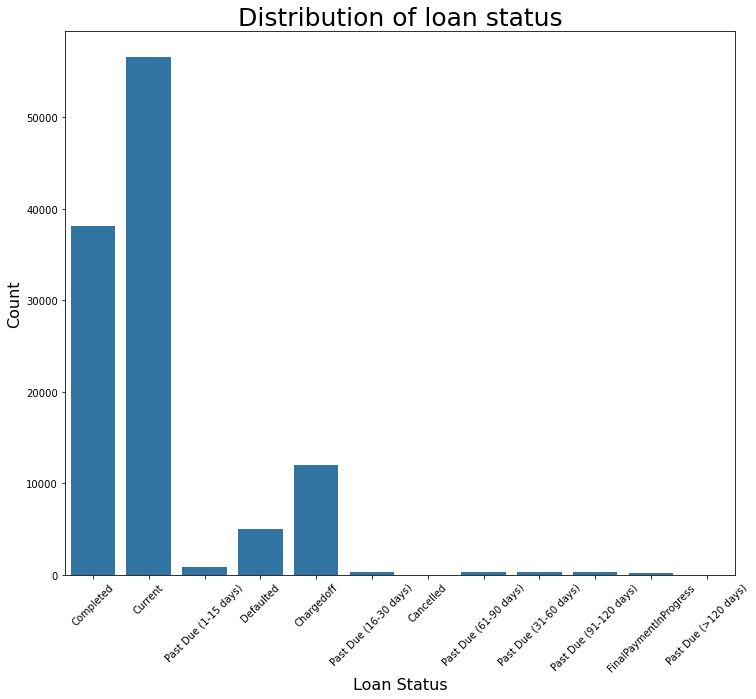

In [11]:
univariate_ploting(df, 'LoanStatus', "Distribution of loan status",45, 'Loan Status', 'Count')

> We found most loans are among completed, current, Defaulted, and charged off; so we recommend making the categories of loan status in the previous categories to make it easier to be tracked and visualized.

## How many recommendations do the borrower have?

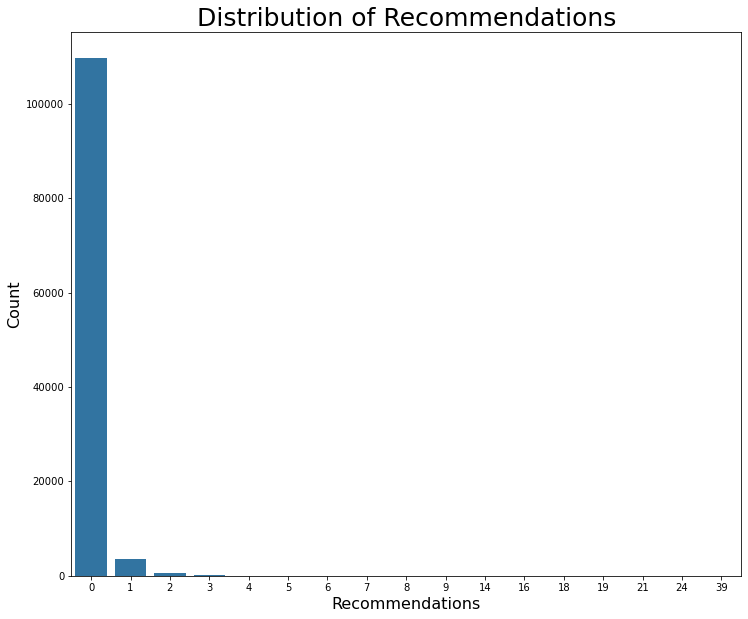

In [12]:
univariate_ploting(df, 'Recommendations', "Distribution of Recommendations",0, 'Recommendations', 'Count')

> It isn't necessary to have recommendations to borrow a loan.

## Is Borrower a home owner?

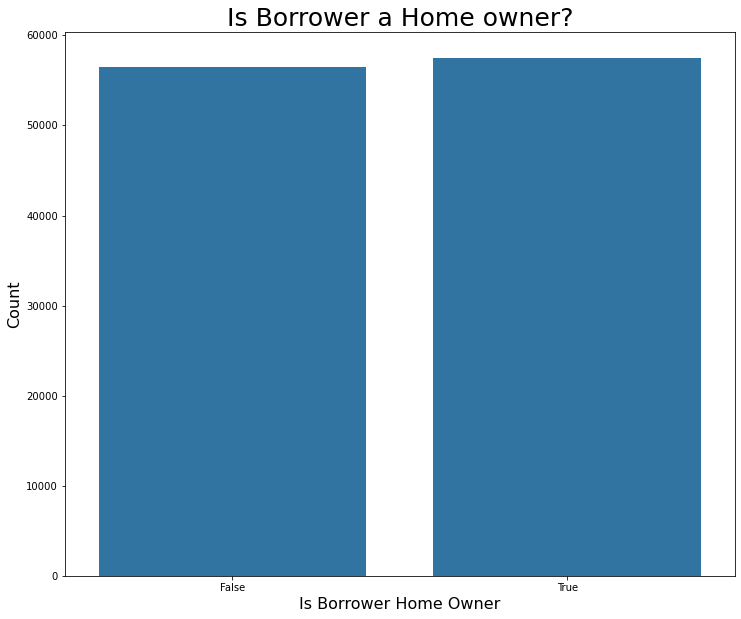

In [13]:
univariate_ploting(df, 'IsBorrowerHomeowner', "Is Borrower a Home owner?",0, 'Is Borrower Home Owner', 'Count')

> The borrower of loan may have home or not; so the loan confirmation doesn't depend on if the borrower is a home owner or not.

## What is the ditribution of term?

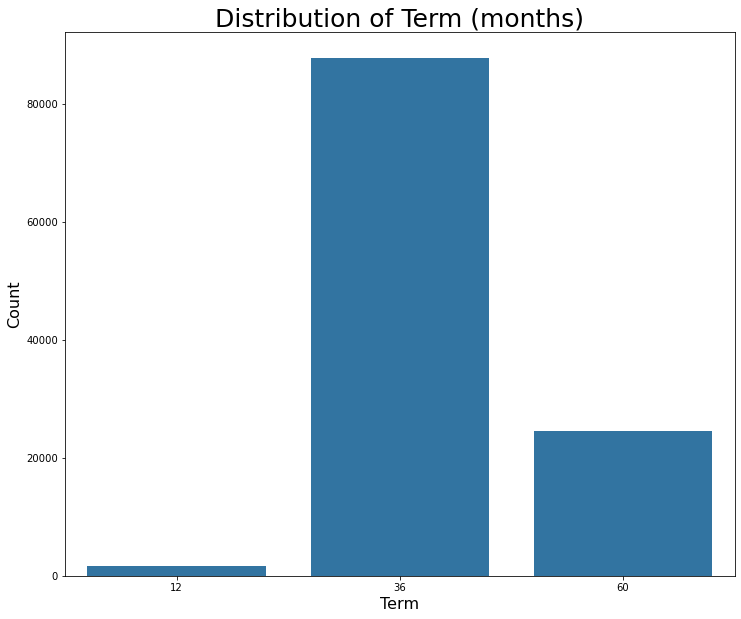

In [14]:
univariate_ploting(df, 'Term', "Distribution of Term (months)",0, 'Term', 'Count')

> Most of loans term length are 36 months.

## Are all borrowers currently in group?

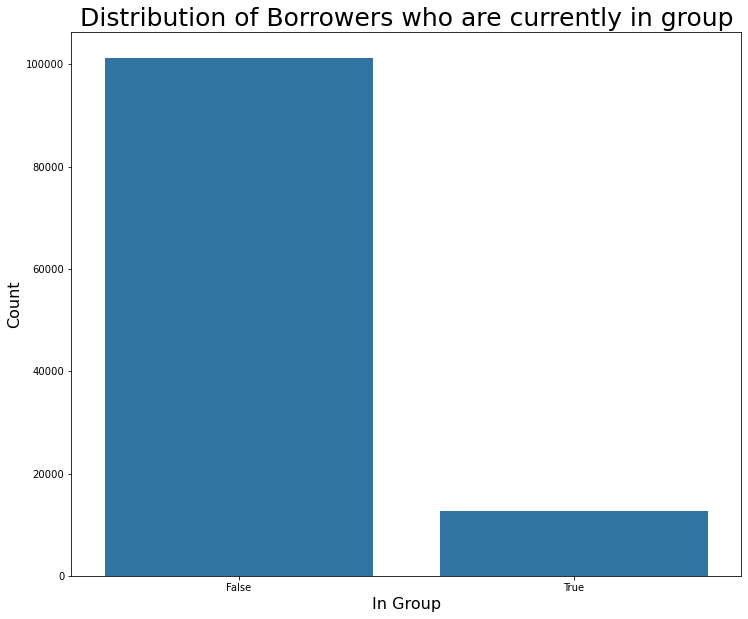

In [15]:
univariate_ploting(df, 'CurrentlyInGroup', "Distribution of Borrowers who are currently in group",0, 'In Group', 'Count')

> Most of borrowers aren't in group in a group at the time the listing was created.

# Bivariate Exploration

## What is the relationship between the borrower rate and his/her income range?

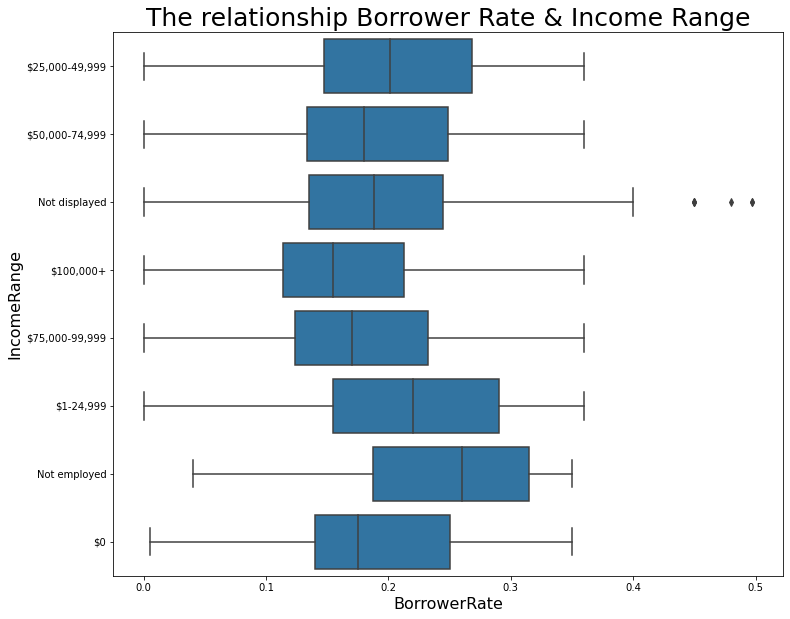

In [16]:
# Figure size
plt.figure(figsize = [12, 10])
# base color
base_color = sb.color_palette()[0]
# x_label, y_label
plt.xlabel('Borrower Rate', fontsize=16)
plt.ylabel('Income Range', fontsize=16)
sb.boxplot(data = df, x = 'BorrowerRate', y = 'IncomeRange', color = base_color)
# Title of plot
plt.title("The relationship Borrower Rate & Income Range", fontsize=25);

> If the borrowers are not employed, their borrowing rate are higher than the others.

## What is the relationship Loan Months Since Origination & Monthly Loan Payment?

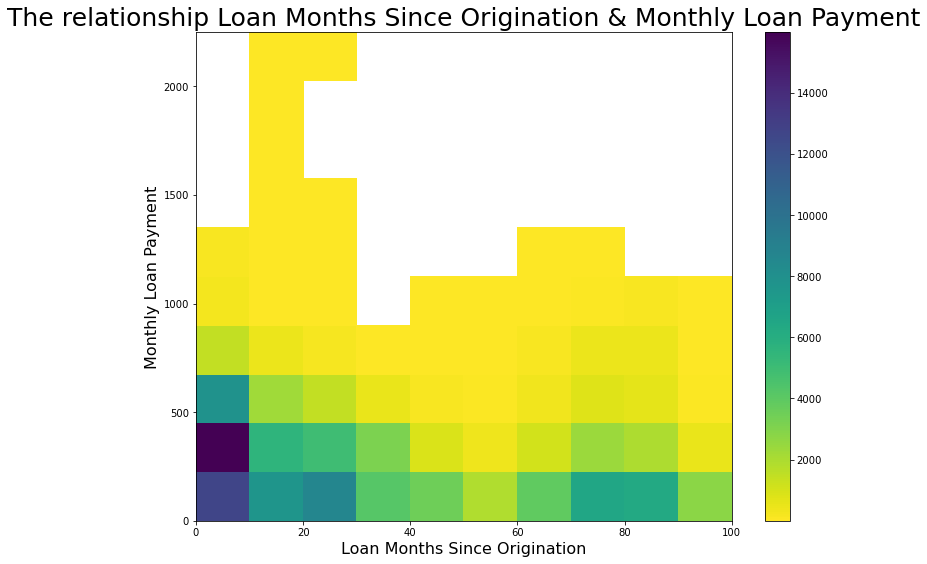

In [28]:
# Figure size
plt.figure(figsize = [12, 9])
plt.hist2d(data = df, x = 'LoanMonthsSinceOrigination', y = 'MonthlyLoanPayment', cmin=0.5, cmap='viridis_r')
plt.colorbar()
# x_label, y_label
plt.xlabel('Loan Months Since Origination', fontsize=16)
plt.ylabel('Monthly Loan Payment', fontsize=16)
# Title of plot
plt.title("The relationship Loan Months Since Origination & Monthly Loan Payment", fontsize=25);

> We found that borrowers are disciplined in loan payment mostly in the first ten months if the payment range from 100 to 1000 USD.

## What is the relationship between Investment From Friends Count & Investment From Friends Amount?

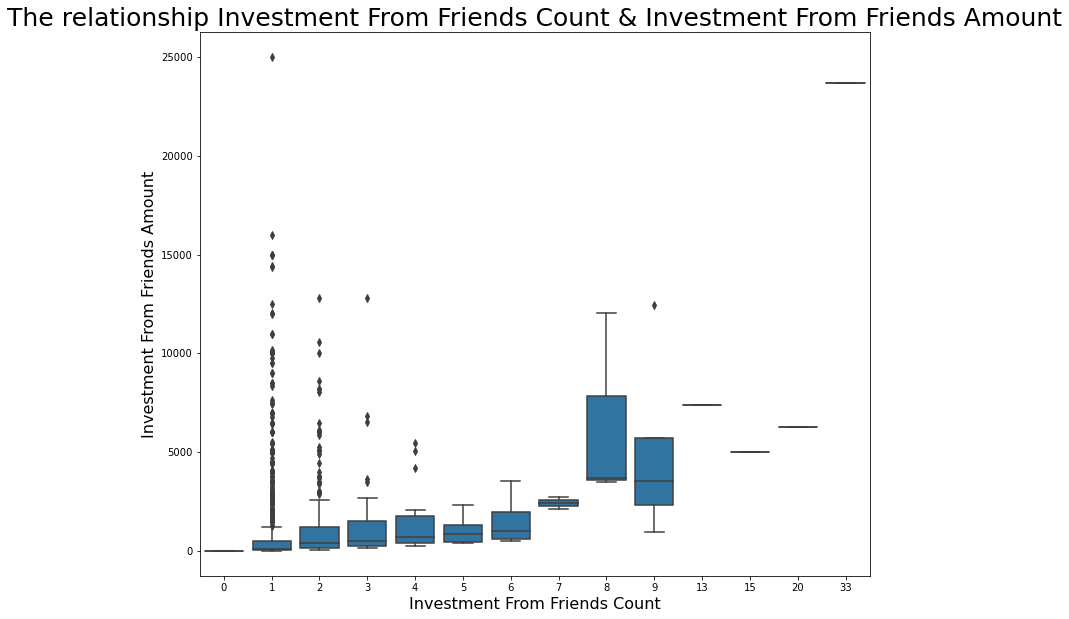

In [18]:
# Figure size
plt.figure(figsize = [12, 10])
# Base color
base_color = sb.color_palette()[0]
sb.boxplot(data = df, x = 'InvestmentFromFriendsCount', y = 'InvestmentFromFriendsAmount', color = base_color)
# x_label, y_label
plt.xlabel('Investment From Friends Count', fontsize=16)
plt.ylabel('Investment From Friends Amount', fontsize=16)
# Title of post
plt.title("The relationship Investment From Friends Count & Investment From Friends Amount", fontsize=25);

> The more friends invest, the lower amount of money they invest in the borrower loan and vise versa.

# Multivariate Exploration

In [19]:
# Function multivariate:
def multivariate_ploting(feature1, feature2, feature3, xlabel, ylabel, collabel, title):
    # Figure size
    plt.figure(figsize = [12, 10])
    plt.scatter(data=df,x=feature1,y = feature2,c= feature3, cmap = 'viridis_r')
    # Color bar
    plt.colorbar(label = collabel)
    # x_label, y_label
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    #Title of post
    plt.title(title, fontsize=25);

## What is the relationship among LenderYield and Borrower APR  vs ProsperRating? 

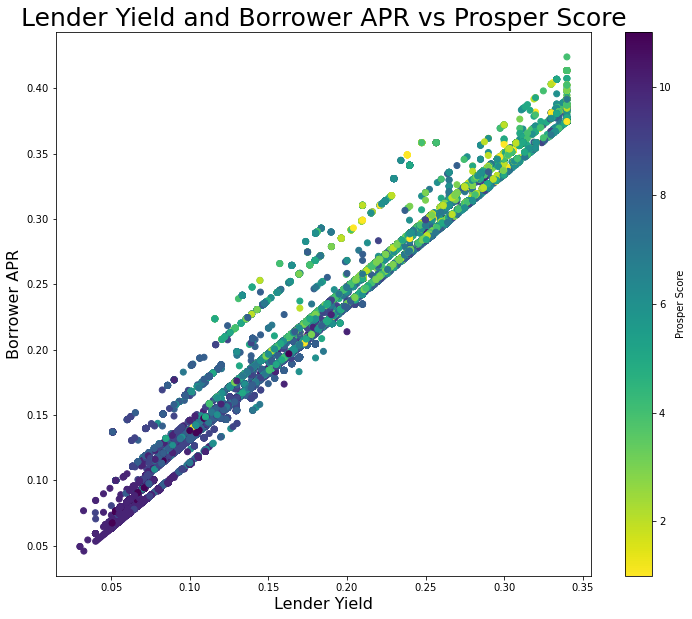

In [20]:
multivariate_ploting('LenderYield', 'BorrowerAPR', 'ProsperScore', 'Lender Yield', 'Borrower APR',
                     'Prosper Score', 'Lender Yield and Borrower APR vs Prosper Score')

> This chart confirms the relations between BorrowerAPR and LenderYield, they have strong positive relationship (strong corrolation). Also, it shows that most of loans with lower BorrowerAPR & LenderYield have higher ProsperScore and visa-versa.

## What is the relationship among Borrower Rate and Estimated Loss  vs Estimated Effective Yield? 

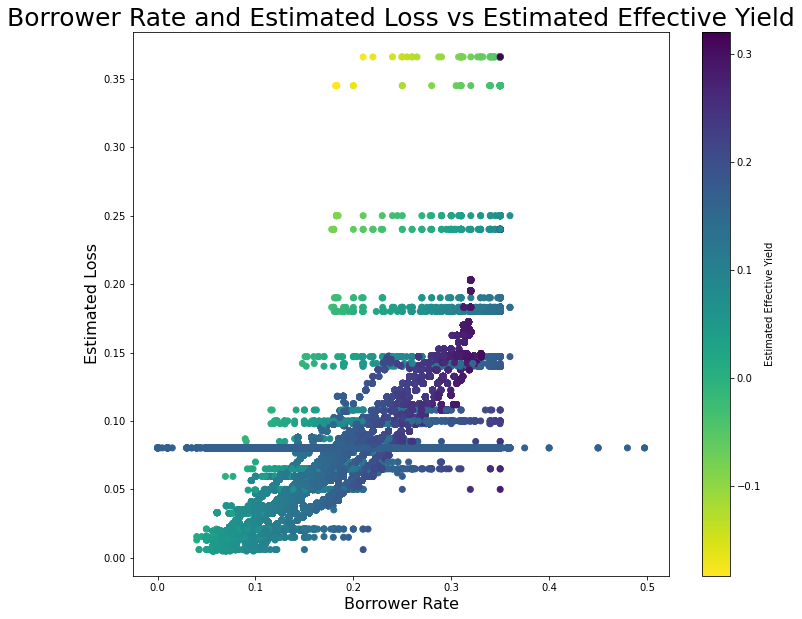

In [21]:
multivariate_ploting('BorrowerRate', 'EstimatedLoss', 'EstimatedEffectiveYield', 'Borrower Rate', 'Estimated Loss',
                     'Estimated Effective Yield', 'Borrower Rate and Estimated Loss vs Estimated Effective Yield')

> This chart confirms the relations between Borrower Rate and Estimated Loss, they have positive relationship in most of points and have constant estimated loss at some samples. 

## What is the relationship amongInvestors and Loan Origination Quarter vs Percent Funded? 

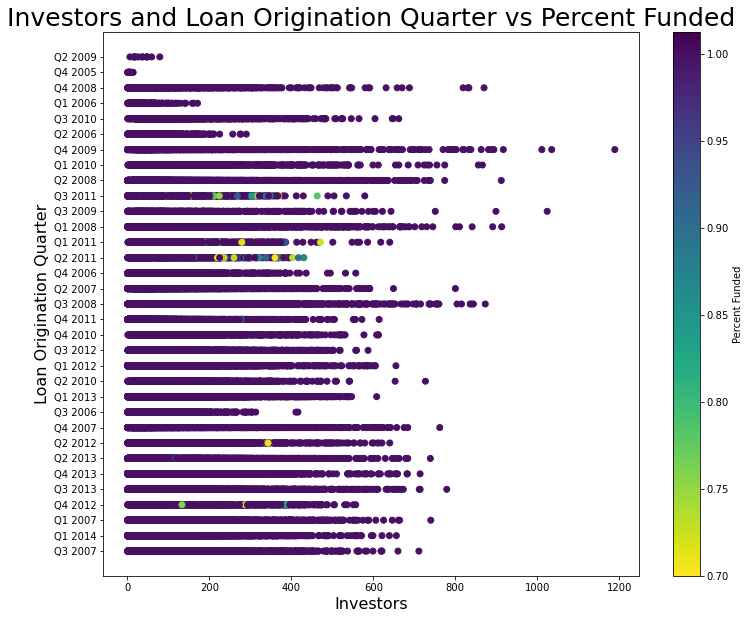

In [22]:
multivariate_ploting('Investors', 'LoanOriginationQuarter', 'PercentFunded', 'Investors', 'Loan Origination Quarter',
                     'Percent Funded', 'Investors and Loan Origination Quarter vs Percent Funded')

> Almost all borrowes are funded.